<a href="https://colab.research.google.com/github/Nathan-Mekuria-Solomon/ML-practice/blob/main/dimensionalty_reduction/dimensionality_reduction_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# load mnist dataset
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml("mnist_784", version= 1, as_frame= False)
X_train, X_test, y_train, y_test = train_test_split(mnist, test_size= 0.2, random_state= 42)

In [7]:
# train random forest classifier
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators= 100)

In [8]:
import time

t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1 = time.time()

In [9]:
print("Training took: {:.2f}s".format(t1 - t0))

Training took: 43.11s


In [11]:
# accuracy
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.9657857142857142

In [10]:
# reduce dimension using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components= 0.95)
X_train_reduced = pca.fit_transform(X_train)

In [14]:
t0 = time.time()
rnd_clf.fit(X_train_reduced, y_train)
t1 = time.time()

In [15]:
print("Training took: {:.2f}s".format(t1 - t0))

Training took: 144.80s


In [17]:
X_test_reduced = pca.transform(X_test)
y_pred = rnd_clf.predict(X_test_reduced)
accuracy_score(y_pred, y_test)

0.9471428571428572

In [18]:
# on softmax regression
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class= "multinomial", solver= "lbfgs", random_state= 42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
print("Training took: {:.2f}s".format(t1 - t0))

Training took: 50.17s


In [20]:
# with pca
log_clf2 = LogisticRegression(multi_class= "multinomial", solver= "lbfgs", random_state= 42)
t0 = time.time()
log_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
print("Training took: {:.2f}s".format(t1- t0))

Training took: 17.21s


In [23]:
# accuracy without pca
y_pred = log_clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.9178571428571428

In [24]:
# accuracy with pca
y_pred = log_clf2.predict(X_test_reduced)
accuracy_score(y_pred, y_test)

0.9152142857142858

In [25]:
# randomly select 10000 samples from mnist
import numpy as np

np.random.seed(42)
idx = np.random.permutation(60000)[:10000]
X, y = mnist["data"][idx], mnist["target"][idx]

In [41]:
# using t-SNE to visualization
from sklearn.manifold import TSNE

tsne = TSNE(n_components= 2, random_state= 42)
X_reduced = tsne.fit_transform(X, y)

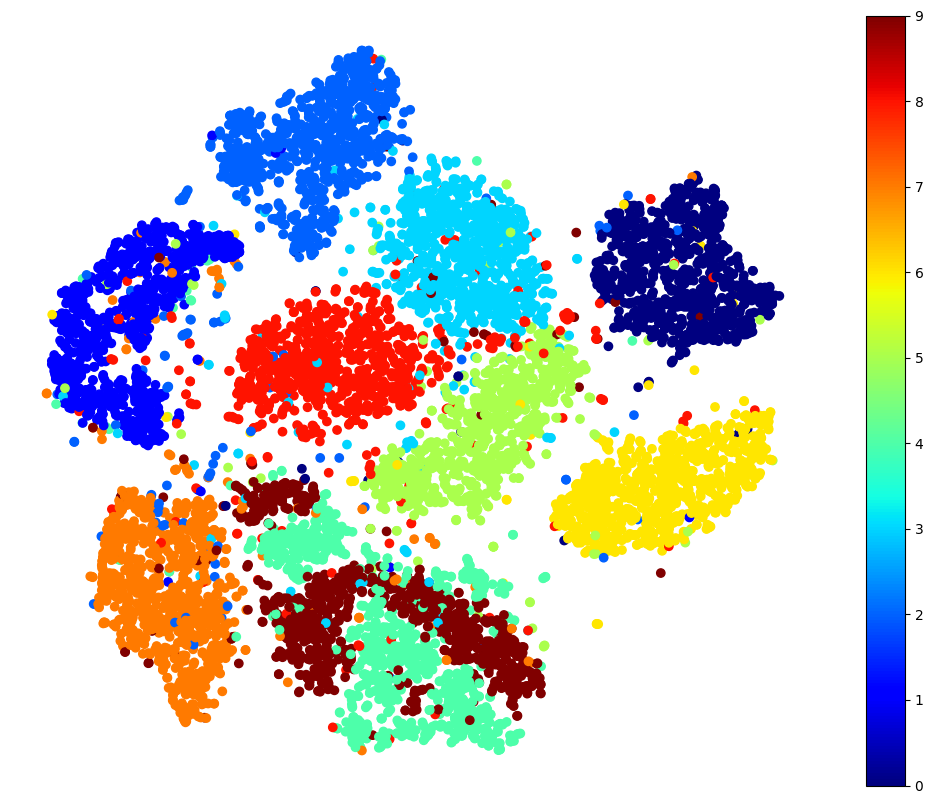

In [45]:
# figure
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize= (13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c= y.astype(int), cmap= "jet") # jet: rainbow colorbar,
plt.axis("off")
plt.colorbar()
plt.show()

In [56]:
y = y.astype(int)

In [57]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# focus on 2, 3, 5
idx = (y == 2) | (y == 3) | (y == 5)
print(idx)
X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components= 2, random_state= 42)
X_subset_reduced = tsne_subset.fit_transform(X_subset, y_subset)

[False  True False ... False False False]


/tmp/ipython-input-58-3167446413.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap("jet")


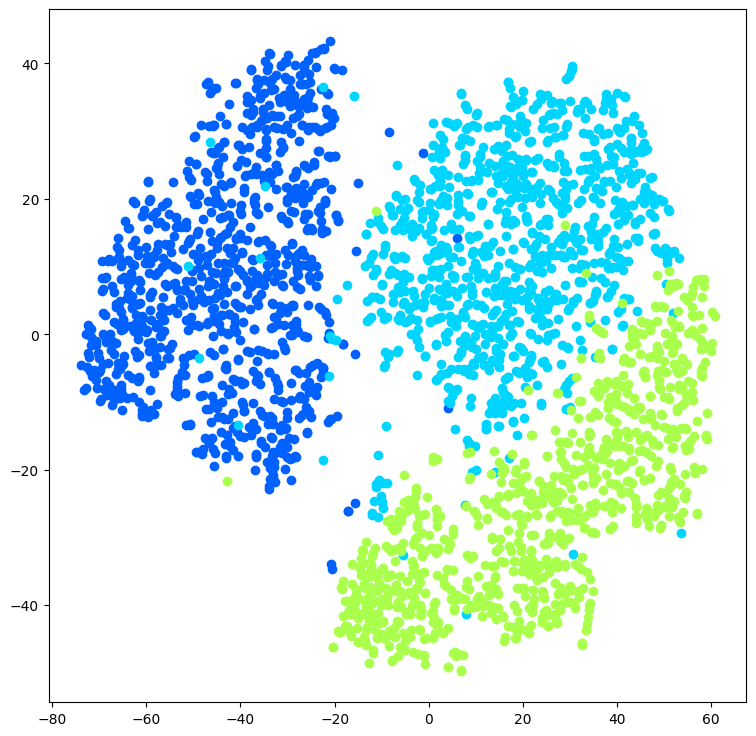

In [58]:
plt.figure(figsize= (9, 9))
cmap = mpl.cm.get_cmap("jet")
for digit in (2, 3, 5):
  plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1], c= [cmap(digit / 9)])